# The Amadeus's Challenge

### Barish Ramírez

<p>Exercise 1:</p>

Count the number of lines in Python for each file:

#### 1. First make a sample:
    
Options:
    
1) Command line <br>
2) Python

In [1]:
pwd

'/Users/Edge/Documents/1 KSCHOOL/Master Data Science/The Amadeus´ Challenge'

In [2]:
ls -l

total 2031528
-rw-r--r--@ 1 Edge  staff     173167 26 nov 18:14 10-11_Python_AmadChall_v18.pptx
-rw-r--r--  1 Edge  staff     159117 30 nov 13:59 amadeus-challenge-2019.ipynb
-rw-r--r--@ 1 Edge  staff  554970628 30 nov 09:06 bookings.csv.bz2
-rw-r--r--  1 Edge  staff     535893 30 nov 12:13 bookings.sample.csv.bz2
-rw-r--r--  1 Edge  staff     425006 30 nov 09:53 bookings.sample2.csv
-rw-r--r--@ 1 Edge  staff     351787 30 nov 09:11 exe-1.png
-rw-r--r--@ 1 Edge  staff  483188920 30 nov 09:06 searches.csv.bz2
-rw-r--r--  1 Edge  staff     244720 30 nov 12:13 searches.sample.csv.bz2
-rw-r--r--  1 Edge  staff      77871 30 nov 13:35 top_airports.csv


In [3]:
! bzcat bookings.csv.bz2 | head -1000 > bookings.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = bookings.csv.bz2, output file = (stdout)


In [4]:
ls

10-11_Python_AmadChall_v18.pptx  bookings.sample2.csv
amadeus-challenge-2019.ipynb     exe-1.png
bookings.csv.bz2                 searches.csv.bz2
bookings.sample.csv              searches.sample.csv.bz2
bookings.sample.csv.bz2          top_airports.csv


In [5]:
# -f force
! bzip2 -f bookings.sample.csv

In [6]:
ls -l

total 2030592
-rw-r--r--@ 1 Edge  staff     173167 26 nov 18:14 10-11_Python_AmadChall_v18.pptx
-rw-r--r--  1 Edge  staff     159117 30 nov 13:59 amadeus-challenge-2019.ipynb
-rw-r--r--@ 1 Edge  staff  554970628 30 nov 09:06 bookings.csv.bz2
-rw-r--r--  1 Edge  staff      54834 13 dic 17:34 bookings.sample.csv.bz2
-rw-r--r--  1 Edge  staff     425006 30 nov 09:53 bookings.sample2.csv
-rw-r--r--@ 1 Edge  staff     351787 30 nov 09:11 exe-1.png
-rw-r--r--@ 1 Edge  staff  483188920 30 nov 09:06 searches.csv.bz2
-rw-r--r--  1 Edge  staff     244720 30 nov 12:13 searches.sample.csv.bz2
-rw-r--r--  1 Edge  staff      77871 30 nov 13:35 top_airports.csv


In [7]:
%%bash
bzcat bookings.csv.bz2 | head -10000 > bookings.sample.csv
bzip2 -f ./bookings.sample.csv

In [8]:
%%bash
bzcat searches.csv.bz2 | head -10000 > searches.sample.csv
bzip2 -f ./searches.sample.csv

In [9]:
ls -l

total 2031528
-rw-r--r--@ 1 Edge  staff     173167 26 nov 18:14 10-11_Python_AmadChall_v18.pptx
-rw-r--r--  1 Edge  staff     159117 30 nov 13:59 amadeus-challenge-2019.ipynb
-rw-r--r--@ 1 Edge  staff  554970628 30 nov 09:06 bookings.csv.bz2
-rw-r--r--  1 Edge  staff     535893 13 dic 17:34 bookings.sample.csv.bz2
-rw-r--r--  1 Edge  staff     425006 30 nov 09:53 bookings.sample2.csv
-rw-r--r--@ 1 Edge  staff     351787 30 nov 09:11 exe-1.png
-rw-r--r--@ 1 Edge  staff  483188920 30 nov 09:06 searches.csv.bz2
-rw-r--r--  1 Edge  staff     244720 13 dic 17:34 searches.sample.csv.bz2
-rw-r--r--  1 Edge  staff      77871 30 nov 13:35 top_airports.csv


### 1) Command line

In [10]:
! cat bookings.sample2.csv | wc -l

    1000


### 2) Python

#### 2a)without uncompressing

In [11]:
import bz2

In [12]:
filename='./bookings.sample.csv.bz2'

In [13]:
fileBz2=bz2.BZ2File(filename)

In [14]:
type(fileBz2)

bz2.BZ2File

In [15]:
#Option 1, with pandas
fileBz2=bz2.BZ2File(filename)
len(fileBz2.readlines())

10000

In [16]:
#Option 2 with a for loop

fileBz2=bz2.BZ2File(filename)
k=0
for line in fileBz2:
    k+=1

print(k)

10000


In [17]:
%whos


Variable   Type       Data/Info
-------------------------------
bz2        module     <module 'bz2' from '//ana<...>a3/lib/python3.7/bz2.py'>
fileBz2    BZ2File    <bz2.BZ2File object at 0x10f79b7f0>
filename   str        ./bookings.sample.csv.bz2
k          int        10000
line       bytes      b'2013-03-12 00:00:00^1A <...>:39^2^2013^3^NULL     \n'


In [18]:
fileBz2.closed

False

In [19]:
#Important, close the file in order to save memory.
fileBz2.close()

In [20]:
#Option 2 with a for loop, but this time with a with condition in order to close the file after use:

with bz2.BZ2File(filename) as fileBz2:
    k=0
    for line in fileBz2:
        k+=1

print(k)
fileBz2.closed

10000


True

In [21]:
#Another option

with bz2.BZ2File(filename) as fileBz2:
    for k, line in enumerate(fileBz2):
        pass

print(k)
fileBz2.closed

9999


True

In [22]:
#one las one, this time with a listcomprenhension

with bz2.BZ2File(filename) as fileBz2:
    k=sum([1 for line in fileBz2])

print(k)
fileBz2.closed

10000


True

In [23]:
#with try and except now

try:
    with bz2.BZ2File(filename) as fileBz2:
        for k, line in enumerate(fileBz2):
            pass
        print(k+1)
               
except FileNotFoundError:
    print('File not Found')
    
except ValueError:
    print('Value Error')

except:
    print('unexpected error')
fileBz2.closed

10000


True

#### Exercise 2:
Top 10 arrival airpots in the world in 2013 (using bookings file)    

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### 0) Prepare booking Sample (we might need this for later)

In [25]:
ls -l

total 2031528
-rw-r--r--@ 1 Edge  staff     173167 26 nov 18:14 10-11_Python_AmadChall_v18.pptx
-rw-r--r--  1 Edge  staff     159117 30 nov 13:59 amadeus-challenge-2019.ipynb
-rw-r--r--@ 1 Edge  staff  554970628 30 nov 09:06 bookings.csv.bz2
-rw-r--r--  1 Edge  staff     535893 13 dic 17:34 bookings.sample.csv.bz2
-rw-r--r--  1 Edge  staff     425006 30 nov 09:53 bookings.sample2.csv
-rw-r--r--@ 1 Edge  staff     351787 30 nov 09:11 exe-1.png
-rw-r--r--@ 1 Edge  staff  483188920 30 nov 09:06 searches.csv.bz2
-rw-r--r--  1 Edge  staff     244720 13 dic 17:34 searches.sample.csv.bz2
-rw-r--r--  1 Edge  staff      77871 30 nov 13:35 top_airports.csv


In [26]:
b = pd.read_csv('bookings.sample.csv.bz2', sep='^', nrows=999)

In [27]:
b.shape

(999, 38)

In [28]:
#Another option

b = pd.read_csv('bookings.sample.csv.bz2', sep='^')
b.shape

(9999, 38)

In [29]:
b.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [30]:
#this command allows us to display the max number of columns

pd.set_option('display.max_columns', None)

In [31]:
b.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [32]:
#sample(number) allows us to display the number of rows we determine.

b.sample(5)

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
5170,2013-03-02 00:00:00,1P,LK,6cea3c80972879bacef462ae038e5349,252366cde4ac56b583ce0600f86fa6e6,fafd48abcba64478dfbef6a2499c2d06,2013-02-14 00:00:00,592,2465,KUL,KUL,MY,CMB,CMB,LK,CMB,CMB,LK,KUL,KUL,MY,CMB,CMB,LK,CMBKUL,CMBKUL,LKMY,1,KULMLECMB,WR,N,Y,2013-03-02 20:45:00,2013-03-03 04:07:51,-1,2013,3,NULL
6983,2013-03-11 00:00:00,1A,IN,fcbc0d1bcea4d2a58102ec46703205c0,1af805c5dbe50daee200695917e91d5b,ff433decc30088488210aff5f83c4da6,2013-03-11 00:00:00,13646,0,BOM,BOM,IN,LHR,LON,GB,BOM,BOM,IN,LHR,LON,GB,VCE,VCE,IT,LHRVCE,LONVCE,GBIT,1,LHRVCE,LK,B,Y,2013-04-15 09:15:00,2013-04-15 12:24:15,1,2013,3,NULL
2090,2013-03-07 00:00:00,1V,MX,ca3cf3ff4273ffa28388c78e13f61a47,7c327131d5f3bf2507d7c1a57be2e0a8,07ee698e05907631be7a60e1b3363d7b,2013-03-07 00:00:00,4684,0,MEX,MEX,MX,CJS,CJS,MX,MEX,MEX,MX,MEX,MEX,MX,CJS,CJS,MX,CJSMEX,CJSMEX,MXMX,0,MEXCJS,KW,W,Y,2013-03-08 16:40:00,2013-03-08 18:16:51,1,2013,3,NULL
2054,2013-03-07 00:00:00,1V,US,f74539339ae66e9f641e2b32c7e511c8,e43a7ba9ba39a4d33a78b9518a208c2e,6e52d935c95f25e7f918e658c8dea848,2013-03-07 00:00:00,6055,0,TUS,TUS,US,BOS,BOS,US,TUS,TUS,US,BOS,BOS,US,TUS,TUS,US,BOSTUS,BOSTUS,USUS,0,BOSORDTUS,KK,W,Y,2013-03-15 06:00:00,2013-03-15 10:50:55,1,2013,3,NULL
8473,2013-03-07 00:00:00,1V,US,79e90353a719aac1f73712b313e41efa,b2470fb24af3ad6f967a9a1d5be75e54,18d9819d00edd888b9866e2606abcdcc,2013-03-07 00:00:00,4401,0,CLE,CLE,US,LGA,NYC,US,CLE,CLE,US,CLE,CLE,US,LGA,NYC,US,CLELGA,CLENYC,USUS,0,CLELGA,NV,K,Y,2013-03-10 18:59:00,2013-03-10 20:34:24,1,2013,3,NULL


In [33]:
b.dtypes

act_date               object
source                 object
pos_ctry               object
pos_iata               object
pos_oid                object
rloc                   object
cre_date               object
duration                int64
distance                int64
dep_port               object
dep_city               object
dep_ctry               object
arr_port               object
arr_city               object
arr_ctry               object
lst_port               object
lst_city               object
lst_ctry               object
brd_port               object
brd_city               object
brd_ctry               object
off_port               object
off_city               object
off_ctry               object
mkt_port               object
mkt_city               object
mkt_ctry               object
intl                    int64
route                  object
carrier                object
bkg_class              object
cab_class              object
brd_time               object
off_time  

In [34]:
b.describe()

,duration,distance,intl,pax,year,month
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.0,9999.0
mean,20209.746075,455.608861,0.596260,0.516152,2013.0,3.0
std,42243.233482,1738.891068,0.490671,1.783970,0.0,0.0
min,59.000000,0.000000,0.000000,-25.000000,2013.0,3.0
25%,3339.000000,0.000000,0.000000,-1.000000,2013.0,3.0
50%,7721.000000,0.000000,1.000000,1.000000,2013.0,3.0
75%,19077.000000,0.000000,1.000000,1.000000,2013.0,3.0
max,488131.000000,18481.000000,1.000000,25.000000,2013.0,3.0


In [35]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 38 columns):
act_date               9999 non-null object
source                 9999 non-null object
pos_ctry               9999 non-null object
pos_iata               9999 non-null object
pos_oid                9999 non-null object
rloc                   9999 non-null object
cre_date               9999 non-null object
duration               9999 non-null int64
distance               9999 non-null int64
dep_port               9999 non-null object
dep_city               9999 non-null object
dep_ctry               9999 non-null object
arr_port               9999 non-null object
arr_city               9999 non-null object
arr_ctry               9999 non-null object
lst_port               9999 non-null object
lst_city               9999 non-null object
lst_ctry               9999 non-null object
brd_port               9999 non-null object
brd_city               9999 non-null object
brd_ctry       

In [36]:
list(b.columns)

['act_date           ',
 'source',
 'pos_ctry',
 'pos_iata',
 'pos_oid  ',
 'rloc          ',
 'cre_date           ',
 'duration',
 'distance',
 'dep_port',
 'dep_city',
 'dep_ctry',
 'arr_port',
 'arr_city',
 'arr_ctry',
 'lst_port',
 'lst_city',
 'lst_ctry',
 'brd_port',
 'brd_city',
 'brd_ctry',
 'off_port',
 'off_city',
 'off_ctry',
 'mkt_port',
 'mkt_city',
 'mkt_ctry',
 'intl',
 'route          ',
 'carrier',
 'bkg_class',
 'cab_class',
 'brd_time           ',
 'off_time           ',
 'pax',
 'year',
 'month',
 'oid      ']

#### 2) Select the columns of interest

In [37]:
b_cols = pd.read_csv('bookings.sample.csv.bz2', sep='^', usecols=['arr_port', 'pax', 'year'])

In [38]:
b_cols.sample(5)

,arr_port,pax,year
823,MGW,1,2013
8135,DRS,2,2013
2620,MNL,1,2013
7120,FAY,1,2013
2434,PRI,4,2013


#### 3) What should we do with NaN?

In [39]:
# we should curate the table and get rid of the NaNs


In [40]:
booking_csv = pd.read_csv('bookings.sample.csv.bz2', sep='^', usecols=['arr_port', 'pax', 'year'])
booking_csv = booking_csv.dropna()

In [41]:
booking_csv.sample(5)

,arr_port,pax,year
8750,LAX,-1,2013
7595,SAN,1,2013
3650,AUA,-1,2013
6223,SEA,5,2013
9670,SDQ,-1,2013


#### 4) Define our action plan:<br>
    start)Filter 2013
    a) Group by airport
    b) sum
    c) sort by pax ascending false
    4) top 10

In [42]:
pd.set_option('display.max_columns', None)

In [43]:
b = pd.read_csv('bookings.sample.csv.bz2', sep='^', usecols=['arr_port', 'pax', 'year'])
b = booking_csv.dropna()
b = b[b ['year']==2013][['arr_port','pax']].groupby('arr_port').sum().sort_values('pax', ascending=False)

In [44]:
b

,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91
SFO,91
MCO,90
DCA,82
DEN,79


In [45]:
booking_csv_arr_port = booking_csv.groupby('arr_port')

len(booking_csv_arr_port)

663

In [46]:
booking_csv_arr_port.head()

,arr_port,pax,year
0,LHR,-1,2013
1,CLT,1,2013
2,CLT,1,2013
3,SVO,1,2013
4,SVO,1,2013
5,LGA,1,2013
6,LGA,1,2013
7,SIN,2,2013
8,SIN,2,2013
9,SIN,2,2013


# 1) iterator=true and get_chunk


In [47]:
b_iter = pd.read_csv('bookings.sample.csv.bz2', sep='^', usecols=['arr_port', 'pax', 'year'], iterator=True)
b = pd.read_csv('bookings.sample.csv.bz2', sep='^', usecols=['arr_port', 'pax', 'year'])

In [48]:
type(b)

pandas.core.frame.DataFrame

In [49]:
type(b_iter)

pandas.io.parsers.TextFileReader

In [50]:
b_chunk = b_iter.get_chunk(3000)

In [51]:
len(b_chunk)

3000

In [52]:
type(b_chunk)

pandas.core.frame.DataFrame

In [53]:
# by chunksize

b_iter = pd.read_csv('bookings.sample.csv.bz2', sep='^', usecols=['arr_port', 'pax', 'year'], chunksize=10)

In [54]:
for i, b_chunk in enumerate(b_iter):
    print(b_chunk.head(5))
    print('---------------')
    if i==3:
        break

   arr_port  pax  year
0  LHR        -1  2013
1  CLT         1  2013
2  CLT         1  2013
3  SVO         1  2013
4  SVO         1  2013
---------------
    arr_port  pax  year
10  SIN         2  2013
11  SIN        -2  2013
12  SIN        -2  2013
13  SIN        -2  2013
14  SIN        -2  2013
---------------
    arr_port  pax  year
20  CTA        -2  2013
21  CTA         2  2013
22  YWG         2  2013
23  YWG         2  2013
24  YWG        -2  2013
---------------
    arr_port  pax  year
30  PVG         2  2013
31  PVG         2  2013
32  PVG         2  2013
33  SGC         1  2013
34  ALG         1  2013
---------------


In [55]:
import pandas as pd
b_iter = pd.read_csv('bookings.sample.csv.bz2', sep='^', usecols=['arr_port', 'pax', 'year'], chunksize=3000)

all_chunks=pd.DataFrame()

for i, b_chunk in enumerate(b_iter):
    print(i)
    b=b_chunk.dropna()
    b = b[b ['year']==2013][['arr_port','pax']].groupby('arr_port').sum()
    all_chunks=all_chunks.append(b)

0
1
2
3


In [56]:
all_chunks.shape

(1344, 1)

In [57]:
#restart the display of the data using reset_index

all_chunks.reset_index().head()

,arr_port,pax
0,ABQ,2
1,ACC,0
2,ADD,4
3,AEP,3
4,AER,1


In [58]:
import pandas as pd
b_iter = pd.read_csv('bookings.sample.csv.bz2', sep='^', usecols=['arr_port', 'pax', 'year'], chunksize=3000)

all_chunks=pd.DataFrame()

for i, b_chunk in enumerate(b_iter):
    print(i)
    b=b_chunk.dropna()
    b = b[b ['year']==2013][['arr_port','pax']].groupby('arr_port').sum()
    all_chunks=all_chunks.append(b)
all_chunks=all_chunks.reset_index().groupby('arr_port').sum().sort_values('pax', ascending=False).reset_index()
all_chunks.head(10)

0
1
2
3


,arr_port,pax
0,HKG,112
1,LGA,95
2,ORD,94
3,JFK,92
4,LAX,91
5,SFO,91
6,MCO,90
7,DCA,82
8,DEN,79
9,LHR,76


In [59]:
all_chunks.shape

(663, 2)

#### Now we've got top of airport

In [60]:
import neobase as nb

In [61]:
dir(nb)

['LatLng',
 'NeoBase',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'neobase']

In [62]:
from neobase import NeoBase

In [63]:
help(NeoBase)

Help on class NeoBase in module neobase.neobase:

class NeoBase(builtins.object)
 |  NeoBase(rows=None, date=None)
 |  
 |  Main structure, a wrapper around a dict, with dict-like behavior.
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key)
 |      Test if a key is in the base.
 |      
 |      :param key: the key of to be tested
 |      :returns:   a boolean
 |      
 |      >>> b = NeoBase()
 |      >>> 'AN' in b
 |      False
 |      >>> 'AGN' in b
 |      True
 |  
 |  __init__(self, rows=None, date=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self)
 |      Returns iterator of all keys in the base.
 |      
 |      :returns: the iterator of all keys
 |      
 |      >>> b = NeoBase()
 |      >>> sorted(b)
 |      ['AAA', 'AAA@1', 'AAB', ...
 |  
 |  __len__(self)
 |      Testing structure size.
 |      
 |      :returns: a integer
 |      
 |      >>> b = NeoBase()
 |      >>> 18000 < len(b) < 20000
 |      True
 |  
 |

In [64]:
geoDict = NeoBase()

In [65]:
dir(geoDict)

['DUPLICATES',
 'FIELDS',
 'KEY',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_distances',
 '_data',
 '_empty_value',
 'distance',
 'distance_between_locations',
 'find_closest_from_location',
 'find_near',
 'find_near_location',
 'find_with',
 'get',
 'get_location',
 'keys',
 'load',
 'set',
 'skip']

In [66]:
sorted(geoDict)

['AAA',
 'AAA@1',
 'AAB',
 'AAB@1',
 'AAC',
 'AAC@1',
 'AAD',
 'AAD@1',
 'AAE',
 'AAE@1',
 'AAF',
 'AAF@1',
 'AAG',
 'AAG@1',
 'AAH',
 'AAH@1',
 'AAI',
 'AAI@1',
 'AAJ',
 'AAJ@1',
 'AAJ@2',
 'AAK',
 'AAK@1',
 'AAL',
 'AAL@1',
 'AAM',
 'AAM@1',
 'AAN',
 'AAN@1',
 'AAO',
 'AAO@1',
 'AAP',
 'AAQ',
 'AAQ@1',
 'AAR',
 'AAR@1',
 'AAS',
 'AAT',
 'AAT@1',
 'AAU',
 'AAU@1',
 'AAV',
 'AAV@1',
 'AAW',
 'AAX',
 'AAX@1',
 'AAY',
 'AAY@1',
 'AAZ',
 'AAZ@1',
 'ABA',
 'ABA@1',
 'ABB',
 'ABB@1',
 'ABC',
 'ABC@1',
 'ABD',
 'ABD@1',
 'ABE',
 'ABE@1',
 'ABF',
 'ABF@1',
 'ABG',
 'ABG@1',
 'ABH',
 'ABH@1',
 'ABI',
 'ABI@1',
 'ABJ',
 'ABJ@1',
 'ABK',
 'ABK@1',
 'ABL',
 'ABL@1',
 'ABM',
 'ABM@1',
 'ABN',
 'ABN@1',
 'ABO',
 'ABO@1',
 'ABP',
 'ABQ',
 'ABQ@1',
 'ABR',
 'ABR@1',
 'ABS',
 'ABS@1',
 'ABT',
 'ABT@1',
 'ABU',
 'ABU@1',
 'ABV',
 'ABV@1',
 'ABW',
 'ABX',
 'ABX@1',
 'ABY',
 'ABY@1',
 'ABZ',
 'ABZ@1',
 'ACA',
 'ACA@1',
 'ACB',
 'ACB@1',
 'ACC',
 'ACC@1',
 'ACD',
 'ACE',
 'ACE@1',
 'ACE@2',
 'ACH',
 'ACH@

In [67]:
geoDict.get('LHR')

{'__dup__': set(),
 'iata_code': 'LHR',
 'name': 'London Heathrow Airport',
 'lat': '51.4775',
 'lng': '-0.461389',
 'page_rank': 0.44517643489228376,
 'country_code': 'GB',
 'country_name': 'United Kingdom',
 'continent_name': 'Europe',
 'timezone': 'Europe/London',
 'city_code_list': ['LON'],
 'city_name_list': ['London'],
 'location_type': ['A'],
 'currency': 'GBP'}

In [68]:
geoDict.get('LHR','name')

'London Heathrow Airport'

In [69]:
all_chunks.reset_index().head()

,index,arr_port,pax
0,0,HKG,112
1,1,LGA,95
2,2,ORD,94
3,3,JFK,92
4,4,LAX,91


In [70]:
all_chunks.arr_port[0]

'HKG     '

In [71]:
#time to get rid of the blankspaces with strip()

all_chunks.arr_port[0].strip()

'HKG'

In [72]:
#lets now apply it to the whole column

all_chunks['arr_port'] = all_chunks['arr_port'].str.strip()

In [73]:
all_chunks.arr_port[0]

'HKG'

In [74]:
#lets compare the values of arr_port and concatenate it with and airport name column

geoDict.get(all_chunks.arr_port[0],'name')

'Hong Kong International Airport'

In [75]:
all_chunks['AirportName'] = all_chunks['arr_port'].map(lambda x: geoDict.get(x,'name'))

In [76]:
all_chunks.head()

,arr_port,pax,AirportName
0,HKG,112,Hong Kong International Airport
1,LGA,95,La Guardia Airport
2,ORD,94,Chicago O'Hare International Airport
3,JFK,92,John F. Kennedy International Airport
4,LAX,91,Los Angeles International Airport


In [77]:
#little twitch to geoBase

print(len(all_chunks))
all_chunks=all_chunks[all_chunks['arr_port'] != 'CPQ']
print(len(all_chunks))

663
663


In [78]:
#Now lets apply the final solution to the full table with our code:
%time
import pandas as pd
from neobase import NeoBase
geoDict=NeoBase()

#b_iter = pd.read_csv('bookings.sample.csv.bz2', sep='^', usecols=['arr_port', 'pax', 'year'], chunksize=3000)
b_iter = pd.read_csv('bookings.csv.bz2', sep='^', usecols=['arr_port', 'pax', 'year'], chunksize=1000000)

all_chunks=pd.DataFrame()
for i, b_chunk in enumerate(b_iter):
    print(i)
    b=b_chunk.dropna()
    b = b[ b['year']==2013][['arr_port','pax']].groupby('arr_port').sum()
    all_chunks=all_chunks.append(b)

all_chunks=all_chunks.reset_index().groupby('arr_port').sum().sort_values('pax', ascending=False).reset_index()
all_chunks['arr_port']=all_chunks['arr_port'].str.strip()
all_chunks=all_chunks[all_chunks['arr_port'] != 'CPQ']
all_chunks['AirportName']=all_chunks['arr_port'].map(lambda x: geoDict.get(x,'name'))
all_chunks.head(10)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11 µs
0
1
2
3
4
5
6


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [79]:
all_chunks['AirportName']=all_chunks['arr_port'].map(lambda x: geoDict.get(x,'name'))
all_chunks.head()

KeyError: 'arr_port'

In [80]:
all_chunks=all_chunks.astype({'pax':int})

In [81]:
all_chunks.head()

,pax
arr_port,
AAB,3
AAE,81
AAL,81
AAN,2
AAQ,165


In [82]:
all_chunks.to_csv('top_airports.csv', sep='^', index=False)

In [83]:
! head ./top_airports.csv

pax
3
81
81
2
165
50
9
4
88


# Write a Web service

http://flask.pocoo.org/docs/0.10/quickstart

In [84]:
from flask import Flask

In [85]:
app = Flask('My first Web Service')
@app.route('/hello', methods=['GET'])
#GET the browser tells the server to just get the information stored on that page and send it.
def get_hello():
    return 'Hello DS from the service'

In [86]:
app.run()

 * Serving Flask app "My first Web Service" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


http://127.0.0.1:5000/hello 

In [ ]:
#Time to upload our data to the Web Service:

app = Flask('My first Web Service')
@app.route('/hello', methods=['GET'])
#GET the browser tells the server to just get the information stored on that page and send it.
def get_hello():
    return 'Hello DS from the service'

@app.route('/ret_number/<int:n>', methods=['GET'])
def get_number(n):
    try:
        numb=int(n)
        return 'your number is %d !!!!' %numb
    except:
        return 'This is not a number'


http://127.0.0.1:5000/ret_number/<int:n>

# Ex 5

In [87]:
top_airports.head(100).to_json()

NameError: name 'top_airports' is not defined

In [93]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [103]:
s=pd.read_csv('searches.csv.bz2', sep='^', nrows=10000)

In [104]:
s.shape

(10000, 45)

In [105]:
s.columns.tolist()

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

In [109]:
s.sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
2700,2013-01-03,19:40:50,FCP,7da60d9e60a322d3fff7e00cb62baa53,BR,NVT,POA,0,1,NVT,POA,2013-01-08,TT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SAO
4637,2013-01-05,11:40:26,MPT,b695299cc14ddcd1e31f1c922b3e258c,US,PUS,CTS,1,2,PUS,CTS,2013-02-07,NaN,NaN,CTS,PUS,2013-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SJC
4208,2013-01-05,12:47:52,MPT,22cf15984f4b13ed8f513a42324666d1,FR,PAR,SFG,1,2,PAR,SFG,2013-02-15,EI,NaN,SFG,PAR,2013-02-23,EI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
1257,2013-01-02,19:41:53,FFP,99a5fa66a00828db9727aea7ebc6ae74,DE,ORY,KRK,1,2,ORY,KRK,2013-08-05,7V,NaN,KRK,ORY,2013-08-22,7V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BER
6082,2013-01-07,17:14:23,MPT,3ac5426dd4f6bb8de28349c7b77e1ee4,IT,OPO,PAR,1,2,OPO,PAR,2013-06-21,NaN,NaN,PAR,OPO,2013-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MIL


In [107]:
s.TxnCode.nunique()

33

In [108]:
s.OfficeID.nunique()

1321

In [110]:
s.TerminalID.nunique()

864

In [113]:
s.describe(include='all')

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
count,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,9973,4047,1143,7196,7196,7161,2870,998,534,534,531,517,508,440,440,439,438,436,103,103,103,103,103,58,58,58,58,58,9925,10000.0,10000.0,10000.0,10000,10000
unique,10,9373,33,1321,104,896,1055,NaN,NaN,896,1046,361,189,27,861,708,361,174,27,225,169,210,89,27,131,160,189,79,26,54,57,82,41,15,35,50,52,30,12,7,NaN,NaN,NaN,864,284
top,2013-01-10,10:23:45,MPT,440642a9bdaeb6287f826cefd73255e8,US,FRA,BKK,NaN,NaN,FRA,BKK,2013-01-11,7V,J,BKK,FRA,2013-01-27,7V,J,JFK,IST,2013-01-26,VR,J,IST,FRA,2013-02-01,VR,J,FRA,AMS,2013-02-22,LK,J,AMS,TXL,2013-02-01,LK,J,1ASIWS,NaN,NaN,NaN,d41d8cd98f00b204e9800998ecf8427e,HPN
freq,1000,3,5821,795,2523,384,268,NaN,NaN,384,269,184,382,331,242,292,90,228,290,13,29,10,46,159,28,38,10,41,141,8,8,4,10,38,8,4,2,6,27,6451,NaN,NaN,NaN,9124,1074
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700700,1.833600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.457974,0.731823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN


In [114]:
s.isnull().sum()

Date                    0
Time                    0
TxnCode                 0
OfficeID                0
Country                 0
Origin                  0
Destination             0
RoundTrip               0
NbSegments              0
Seg1Departure           0
Seg1Arrival             0
Seg1Date               27
Seg1Carrier          5953
Seg1BookingCode      8857
Seg2Departure        2804
Seg2Arrival          2804
Seg2Date             2839
Seg2Carrier          7130
Seg2BookingCode      9002
Seg3Departure        9466
Seg3Arrival          9466
Seg3Date             9469
Seg3Carrier          9483
Seg3BookingCode      9492
Seg4Departure        9560
Seg4Arrival          9560
Seg4Date             9561
Seg4Carrier          9562
Seg4BookingCode      9564
Seg5Departure        9897
Seg5Arrival          9897
Seg5Date             9897
Seg5Carrier          9897
Seg5BookingCode      9897
Seg6Departure        9942
Seg6Arrival          9942
Seg6Date             9942
Seg6Carrier          9942
Seg6BookingC

### define our colums of interest (date, Destinantion)

In [115]:
Date, Destination

NameError: name 'Date' is not defined

In [117]:
s=pd.read_csv('searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=10000)
s=s.dropna()

In [121]:
s.head(3)

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO


#### Planing:

In [120]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Date           10000 non-null object
Destination    10000 non-null object
dtypes: object(2)
memory usage: 234.4+ KB


In [158]:
s=pd.read_csv('searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=10000)
print(s.shape)
s=s.dropna()
print(s.shape)
s= s[s.Destination.isin(['MAD', 'BCN', 'AGP'])]
print(s.shape)

(10000, 2)
(10000, 2)
(335, 2)


In [155]:
#ejemplo de parsear data al abrir el fichero
s=pd.read_csv('searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], parse_dates=['Date'], nrows=10000)

In [156]:
s

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD
5,2013-01-01,BLR
6,2013-01-01,PAR
7,2013-01-01,DUB
8,2013-01-01,ACE
9,2013-01-01,BGW


In [163]:
# - Formatear el mes (YY/MM) con un Slice y la creación de una nueva columna 'Plot_Date'

s['Plot_Date']=s.Date.str[:7]

In [160]:
s.head()

,Date,Destination,Plot_Date
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


In [161]:
s_gr=s.groupby(['Plot_Date', 'Destination']).count()

In [162]:
s_gr.head()

Date
Plot_Date Destination      
2013-01   AGP            48
          BCN           162
          MAD           125

In [171]:
s=pd.read_csv('searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=10000)
s=s.dropna()
s= s[s.Destination.isin(['MAD', 'BCN', 'AGP'])]
s['Date']=s.Date.str[:7]
s_gr=s.groupby(['Date', 'Destination']).size()
#s_gr=s.groupby(['Plot_Date', 'Destination']).count()---> no salen los datos


s_gr.head()

Date     Destination
2013-01  AGP             48
         BCN            162
         MAD            125
dtype: int64

In [169]:
s_gr=s.groupby(['Date', 'Destination']).size()
s_gr.head()

Date     Destination
2013-01  AGP             48
         BCN            162
         MAD            125
dtype: int64

In [172]:
type(s_gr)

pandas.core.series.Series

In [182]:
s=pd.read_csv('searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=100000)
s=s.dropna()
s= s[s.Destination.isin(['MAD', 'BCN', 'AGP'])]
s['Plot_Date']=s.Date.str[:7]
s_gr=s.groupby(['Plot_Date', 'Destination']).count()
s_gr=s_gr.reset_index()

In [183]:
s_gr.head()

,Plot_Date,Destination,Date
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497


In [184]:
to_plot=s_gr.pivot('Plot_Date', 'Destination', 'Date')

In [186]:
to_plot

Destination,AGP,BCN,MAD
Plot_Date,,,
2013-01,169,517,425
2013-02,147,497,400
2013-03,187,536,433
2013-04,31,174,147


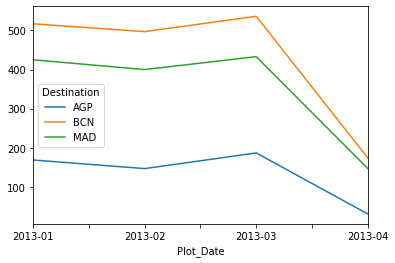

In [188]:
to_plot.plot();

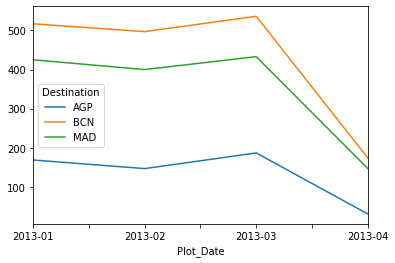

In [195]:
# The whole code:

s=pd.read_csv('searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=100000)
s=s.dropna()
s= s[s.Destination.isin(['MAD', 'BCN', 'AGP'])]
s['Plot_Date']=s.Date.str[:7]
s_gr=s.groupby(['Plot_Date', 'Destination']).count()
s_gr=s_gr.reset_index()
to_plot=s_gr.pivot('Plot_Date', 'Destination', 'Date')
to_plot.plot();

In [ ]:
%time
import pandas as pd
from neobase import NeoBase
geoDict=NeoBase()

#b_iter = pd.read_csv('bookings.sample.csv.bz2', sep='^', usecols=['arr_port', 'pax', 'year'], chunksize=3000)
b_iter = pd.read_csv('bookings.csv.bz2', sep='^', usecols=['arr_port', 'pax', 'year'], chunksize=1000000)

all_chunks=pd.DataFrame()
for i, b_chunk in enumerate(b_iter):
    print(i)
    b=b_chunk.dropna()
    b = b[ b['year']==2013][['arr_port','pax']].groupby('arr_port').sum()
    all_chunks=all_chunks.append(b)

all_chunks=all_chunks.reset_index().groupby('arr_port').sum().sort_values('pax', ascending=False).reset_index()
all_chunks['arr_port']=all_chunks['arr_port'].str.strip()
all_chunks=all_chunks[all_chunks['arr_port'] != 'CPQ']
all_chunks['AirportName']=all_chunks['arr_port'].map(lambda x: geoDict.get(x,'name'))
all_chunks.head(10)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs
0
1
2
3
4
5
6
7
8
9


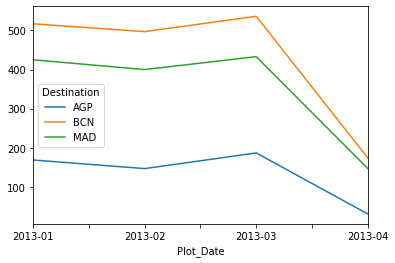

In [198]:
#CHUNKS

%time
all_chunks=pd.DataFrame()
sc=pd.read_csv('searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=100000, chunksize=10000)


for i, chunk in enumerate(sc):
    print(i)
    s=chunk.dropna()
    s= s[s.Destination.isin(['MAD', 'BCN', 'AGP'])]
    s['Plot_Date']=s.Date.str[0:7]
    s_gr=s.groupby(['Plot_Date', 'Destination']).count()
    s_gr=s_gr.reset_index()
    all_chunks=all_chunks.append(s_gr)

all_chunks_gr=all_chunks.groupby(['Plot_Date', 'Destination']).sum().reset_index()
to_plot=all_chunks_gr.pivot('Plot_Date', 'Destination', 'Date')
to_plot.plot();

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


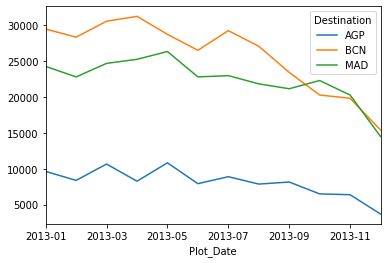

In [199]:
#Now we apply our code to the whole file:

%time
all_chunks=pd.DataFrame()
#sc=pd.read_csv('searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=100000, chunksize=10000)
sc=pd.read_csv('searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], chunksize=500000)


for i, chunk in enumerate(sc):
    print(i)
    s=chunk.dropna()
    s= s[s.Destination.isin(['MAD', 'BCN', 'AGP'])]
    s['Plot_Date']=s.Date.str[0:7]
    s_gr=s.groupby(['Plot_Date', 'Destination']).count()
    s_gr=s_gr.reset_index()
    all_chunks=all_chunks.append(s_gr)

all_chunks_gr=all_chunks.groupby(['Plot_Date', 'Destination']).sum().reset_index()
to_plot=all_chunks_gr.pivot('Plot_Date', 'Destination', 'Date')
to_plot.plot();

In [200]:
all_chunks_gr

,Plot_Date,Destination,Date
0,2013-01,AGP,9633
1,2013-01,BCN,29469
2,2013-01,MAD,24258
3,2013-02,AGP,8379
4,2013-02,BCN,28329
5,2013-02,MAD,22800
6,2013-03,AGP,10659
7,2013-03,BCN,30552
8,2013-03,MAD,24681
9,2013-04,AGP,8265


In [201]:
import pandas as pd

In [202]:
ls -l

total 2031840
-rw-r--r--@ 1 Edge  staff     173167 26 nov 18:14 10-11_Python_AmadChall_v18.pptx
-rw-r--r--  1 Edge  staff     344764 13 dic 20:22 amadeus-challenge-2019.ipynb
-rw-r--r--@ 1 Edge  staff  554970628 30 nov 09:06 bookings.csv.bz2
-rw-r--r--  1 Edge  staff     535893 13 dic 17:34 bookings.sample.csv.bz2
-rw-r--r--  1 Edge  staff     425006 30 nov 09:53 bookings.sample2.csv
-rw-r--r--@ 1 Edge  staff     351787 30 nov 09:11 exe-1.png
-rw-r--r--@ 1 Edge  staff  483188920 30 nov 09:06 searches.csv.bz2
-rw-r--r--  1 Edge  staff     244720 13 dic 17:34 searches.sample.csv.bz2
-rw-r--r--  1 Edge  staff      47443 13 dic 17:37 top_airports.csv
-rw-r--r--@ 1 Edge  staff        165 13 dic 18:13 ~$10-11_Python_AmadChall_v18.pptx


In [207]:
%time
bc=pd.read_csv('bookings.csv.bz2', sep='^', chunksize=500000, low_memory=False, dtype=str)

all_chunks=pd.DataFrame()
for i, chunk in enumerate(bc):
    all_chunks=all_chunks.append(chunk)
    all_chunks.drop_duplicates(inplace=True)
    print((1+i)*500000, len(all_chunks))

all_chunks.to_csv('booking_no_dup.csv', sep='^', index=False)
! bzip2 -f booking_no_dup.csv

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.91 µs
500000 500000
1000000 1000000
1500000 1000000
2000000 1000000
2500000 1000000
3000000 1000000
3500000 1000000
4000000 1000000
4500000 1000000
5000000 1000000
5500000 1000003
6000000 1000003
6500000 1000003
7000000 1000003
7500000 1000003
8000000 1000003
8500000 1000003
9000000 1000003
9500000 1000003
10000000 1000003
10500000 1000003


In [208]:
%time
bc=pd.read_csv('searches.csv.bz2', sep='^', chunksize=500000, low_memory=False, dtype=str)

all_chunks=pd.DataFrame()
for i, chunk in enumerate(bc):
    all_chunks=all_chunks.append(chunk)
    all_chunks.drop_duplicates(inplace=True)
    print((1+i)*500000, len(all_chunks))

all_chunks.to_csv('searches_no_dup.csv', sep='^', index=False)
! bzip2 -f searches_no_dup.csv

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 11 µs
500000 358999
1000000 358999
1500000 359003
2000000 359003
2500000 359003
3000000 359003
3500000 359003
4000000 359003
4500000 359003
5000000 359003
5500000 359003
6000000 359003
6500000 359003
7000000 359003
7500000 359003
8000000 359003
8500000 359003
9000000 359003
9500000 359003
10000000 359003
10500000 359003
11000000 359003
11500000 359003
12000000 359003
12500000 359003
13000000 359003
13500000 359003
14000000 359003
14500000 359003
15000000 359003
15500000 359003
16000000 359003
16500000 359003
17000000 359003
17500000 359003
18000000 359003
18500000 359003
19000000 359003
19500000 359003
20000000 359003
20500000 359004


In [216]:
s_ndup=pd.read_csv('searches_no_dup.csv.bz2', sep='^', nrows=10000)

In [223]:
s_ndup.columns.to_list()

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

In [218]:
s_ndup.describe()

,RoundTrip,NbSegments,IsPublishedForNeg,IsFromInternet,IsFromVista
count,10000.000000,10000.000000,10000.0,10000.0,10000.0
mean,0.700700,1.833600,0.0,0.0,0.0
std,0.457974,0.731823,0.0,0.0,0.0
min,0.000000,1.000000,0.0,0.0,0.0
25%,0.000000,1.000000,0.0,0.0,0.0
50%,1.000000,2.000000,0.0,0.0,0.0
75%,1.000000,2.000000,0.0,0.0,0.0
max,1.000000,9.000000,0.0,0.0,0.0


In [221]:
s_ndup.shape

(10000, 45)

Action Plan:


1. Remove duplicates
2. read 3 columns from each file
3. Remove white spaces from booking dep/arr
4. Remove duplicates from booking
5. save index from the file
6. Create column "booked" with 1 in bookings table
7. Merge on 3 columns
8. fill "booked" of merge table with 0


In [ ]:
# 1. We remove duplicates and add them to a different file:

%%time
bc=pd.read_csv('searches.csv.bz2', sep='^', chunksize=500000, low_memory=False, dtype=str)

all_chunks=pd.DataFrame()
for i, chunk in enumerate(bc):
    all_chunks=all_chunks.append(chunk)
    all_chunks.drop_duplicates(inplace=True)
    print((1+i)*500000, len(all_chunks))

all_chunks.to_csv('searches_no_dup.csv', sep='^', index=False)
! bzip2 -f searches_no_dup.csv

In [228]:
s=pd.read_csv('searches_no_dup.csv.bz2', sep='^', nrows=10000)
s.columns.to_list()

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

In [227]:
b=pd.read_csv('booking_no_dup.csv.bz2', sep='^', nrows=10000)
b.columns.to_list()

['act_date           ',
 'source',
 'pos_ctry',
 'pos_iata',
 'pos_oid  ',
 'rloc          ',
 'cre_date           ',
 'duration',
 'distance',
 'dep_port',
 'dep_city',
 'dep_ctry',
 'arr_port',
 'arr_city',
 'arr_ctry',
 'lst_port',
 'lst_city',
 'lst_ctry',
 'brd_port',
 'brd_city',
 'brd_ctry',
 'off_port',
 'off_city',
 'off_ctry',
 'mkt_port',
 'mkt_city',
 'mkt_ctry',
 'intl',
 'route          ',
 'carrier',
 'bkg_class',
 'cab_class',
 'brd_time           ',
 'off_time           ',
 'pax',
 'year',
 'month',
 'oid      ']

In [242]:
import pandas as pd
pd.set_option('display.max_columns', None)
s=pd.read_csv('searches_no_dup.csv.bz2', sep='^', low_memory=False)
#s=pd.read_csv('searches_no_dup.csv.bz2', sep='^', usecols=['Date','Origin','Destination'])

b=pd.read_csv('booking_no_dup.csv.bz2', sep='^', usecols=['cre_date           ','dep_port','arr_port'])
b.columns=b.columns.str.strip()
b.dep_port=b.dep_port.str.strip()
b.arr_port=b.arr_port.str.strip()
b.cre_date=b.cre_date.str[0:10]
b.drop_duplicates(inplace=True)
b['booked']=1

In [243]:
b.head()

,cre_date,dep_port,arr_port,booked
0,2013-02-22,ZRH,LHR,1
1,2013-03-26,SAL,CLT,1
3,2013-03-26,AKL,SVO,1
5,2013-03-20,DEN,LGA,1
7,2013-03-25,NRT,SIN,1


In [244]:
s.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0.0,1.0,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1.0,2.0,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0.0,1.0,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1.0,2.0,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [245]:
s_b=s.merge(b, how='left', 
            left_on=['Date','Origin','Destination'],
            right_on=['cre_date','dep_port','arr_port'])

In [246]:
len(s_b)

359004

In [247]:
s_b.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,cre_date,dep_port,arr_port,booked
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,NaN,NaN,NaN,NaN
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0.0,1.0,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV,NaN,NaN,NaN,NaN
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1.0,2.0,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,NaN,NaN,NaN,NaN
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0.0,1.0,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO,NaN,NaN,NaN,NaN
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1.0,2.0,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL,NaN,NaN,NaN,NaN


In [248]:
s_b.drop(['cre_date','dep_port','arr_port'], axis=1, inplace=True)

In [249]:
s_b.tail()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,booked
358999,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,NaN,NaN,NaN,NaN
359000,"2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359001,2013-01-01,18:04:49,MPT,3561,US,ICT,SFO,1.0,2.0,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,NaN
359002,2013-01-01,19:57:57,MPT,28d7a8c95e4db88589d3d35b66920e78,DE,FRA,BGW,1.0,2.0,FRA,BGW,2013-02-26,NaN,NaN,BGW,FRA,2013-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BNJ,NaN,NaN,NaN
359003,2013-10-13,18:57:54,MTP,e41c9d833aa74600552f2ed688b67d81,AT,VIE,HA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
s_b[ s_b['booked']>0].head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,booked
27,2013-01-01,18:33:28,CCP,3565e31495ecfd46fa018339d20382b1,SA,RUH,JED,0.0,1.0,RUH,JED,2013-01-04,KP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,JED,1.0
40,2013-01-01,06:36:57,FFP,86f167b84e77346849f9439ae87c02a6,SA,DMM,MNL,1.0,2.0,DMM,MNL,2013-06-01,OJ,NaN,MNL,DMM,2013-06-30,OJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,JED,1.0
59,2013-01-01,07:00:38,FQD,e8741eaf2fa2f71f931475d18fa72096,US,ATL,MIA,0.0,1.0,ATL,MIA,2013-01-10,NV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SEA,1.0
134,2013-01-01,23:30:44,MPT,5215502d9524c3183f3839b0d9a5e4f9,AU,MEL,SYD,0.0,1.0,MEL,SYD,2013-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SYD,1.0
172,2013-01-01,18:34:27,MPT,fd4afff0035bec8f8e305d38804c33f6,IN,BOM,JED,1.0,2.0,BOM,JED,2013-01-26,NaN,NaN,JED,BOM,2013-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,DEL,1.0


In [251]:
s_b['booked']=s_b['booked'].fillna(0)

In [252]:
s_b=s_b.astype({'booked':int})

In [254]:
s_b.tail(3)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,booked
359001,2013-01-01,18:04:49,MPT,3561,US,ICT,SFO,1.0,2.0,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,0
359002,2013-01-01,19:57:57,MPT,28d7a8c95e4db88589d3d35b66920e78,DE,FRA,BGW,1.0,2.0,FRA,BGW,2013-02-26,NaN,NaN,BGW,FRA,2013-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BNJ,NaN,NaN,0
359003,2013-10-13,18:57:54,MTP,e41c9d833aa74600552f2ed688b67d81,AT,VIE,HA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [255]:
import pandas as pd
pd.set_option('display.max_columns', None)
s=pd.read_csv('searches_no_dup.csv.bz2', sep='^', low_memory=False)
#s=pd.read_csv('searches_no_dup.csv.bz2', sep='^', usecols=['Date','Origin','Destination'])

b=pd.read_csv('booking_no_dup.csv.bz2', sep='^', usecols=['cre_date           ','dep_port','arr_port'])
b.columns=b.columns.str.strip()
b.dep_port=b.dep_port.str.strip()
b.arr_port=b.arr_port.str.strip()
b.cre_date=b.cre_date.str[0:10]
b.drop_duplicates(inplace=True)
b['booked']=1

s_b=s.merge(b, how='left', 
            left_on=['Date','Origin','Destination'],
            right_on=['cre_date','dep_port','arr_port'])

s_b['booked']=s_b['booked'].fillna(0)
s_b=s_b.astype({'booked':int})

In [257]:
s_b.to_csv('searches_with_book.csv', sep='^', index=False)